In [4]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [5]:
data = pd.read_csv("D:\Air Quality Index Prediction\Real_data\Real_Combine.csv")

In [5]:
data.head(5)

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

In [6]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

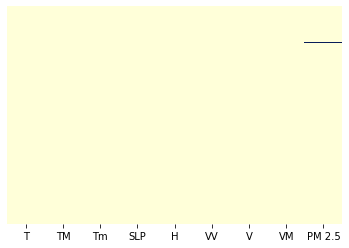

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [11]:
data = data.dropna()

In [12]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

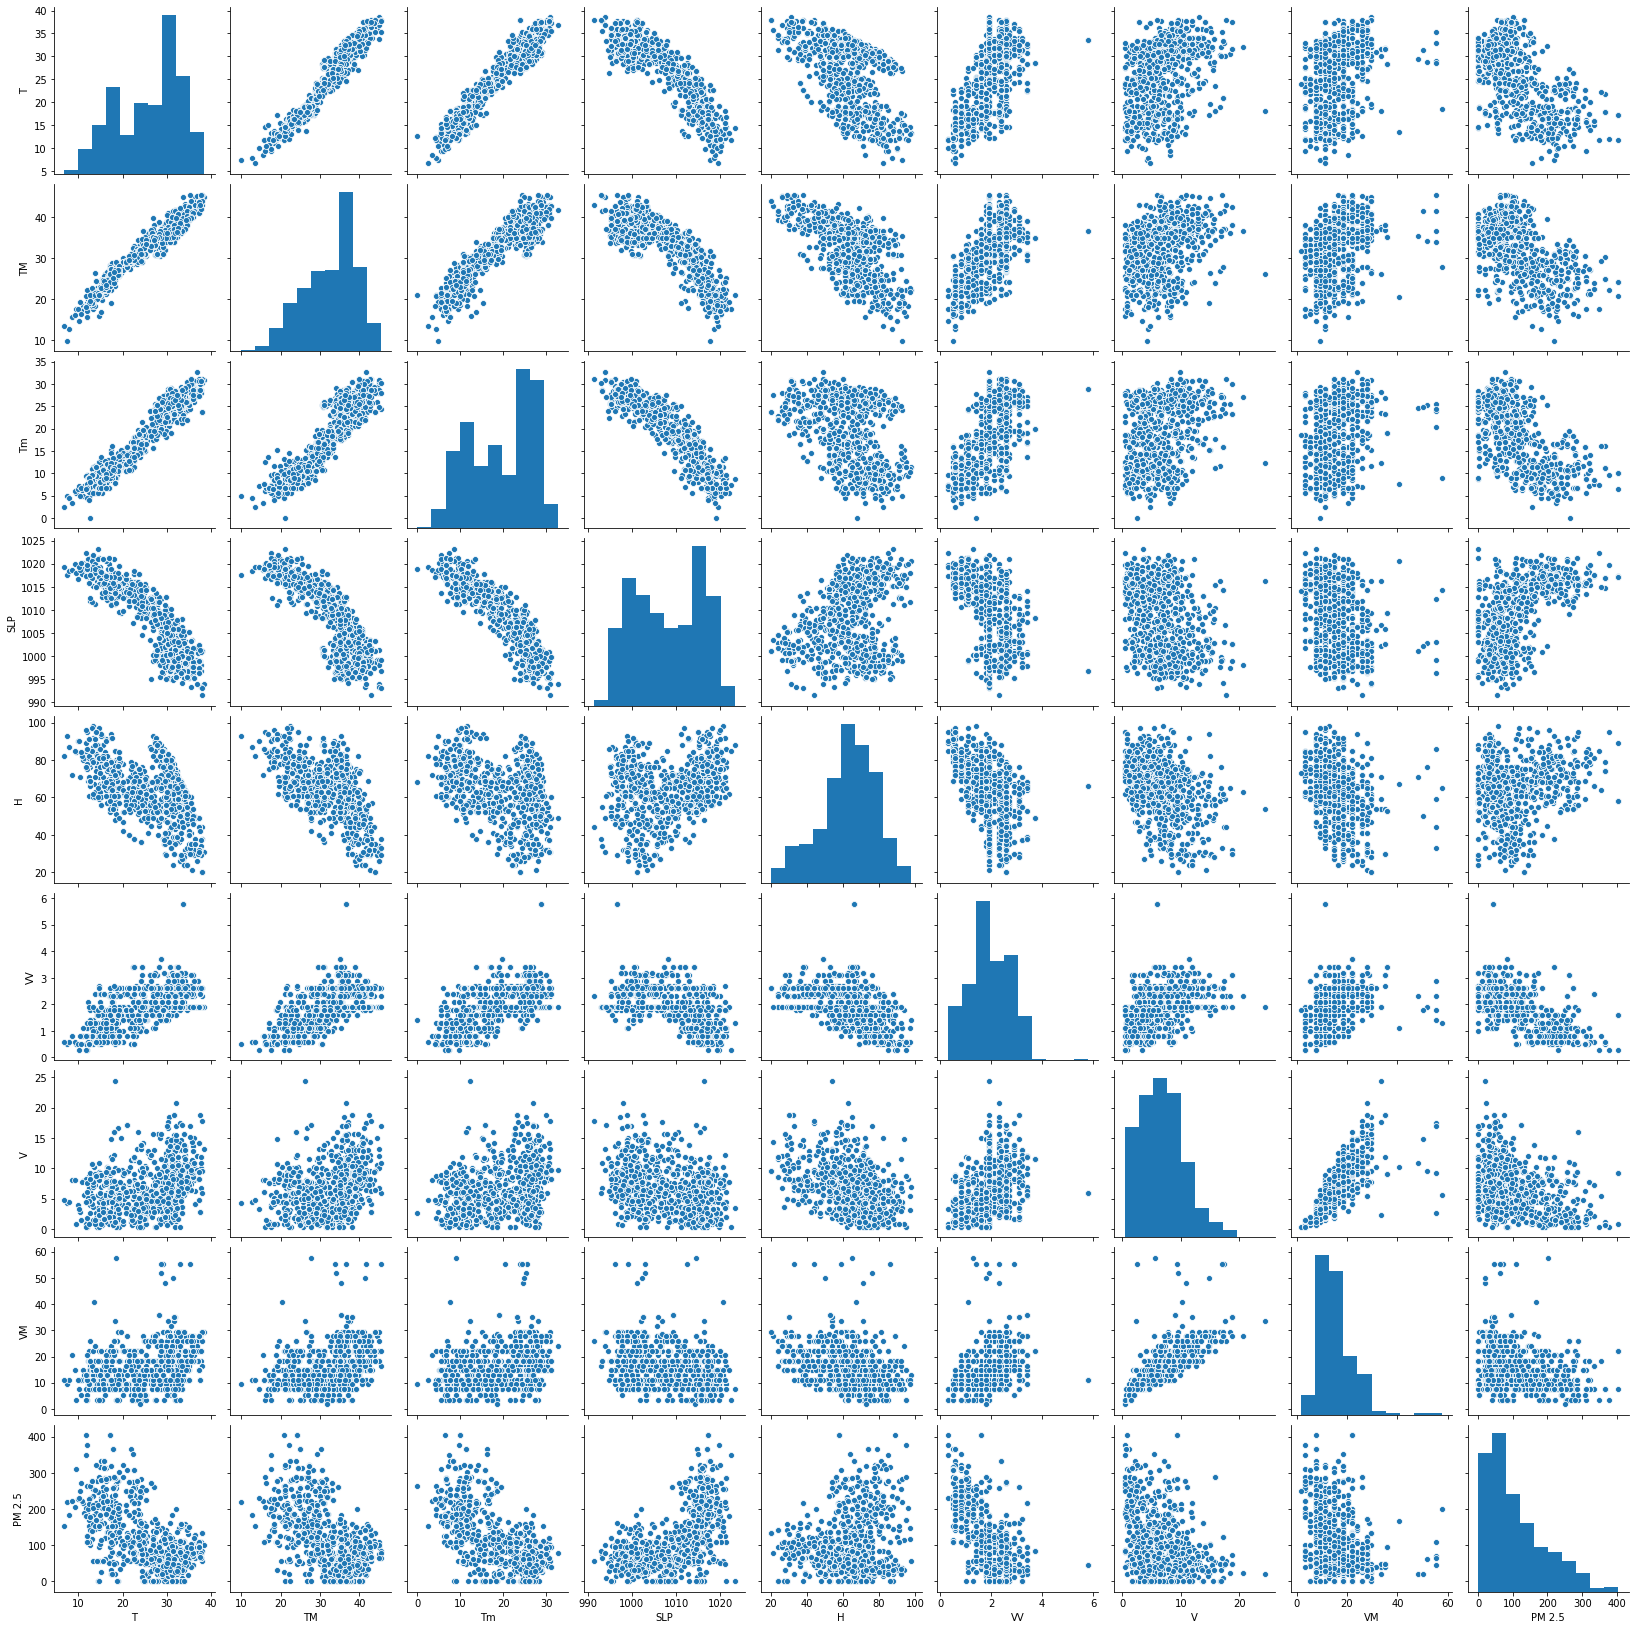

In [13]:
sns.pairplot(data)

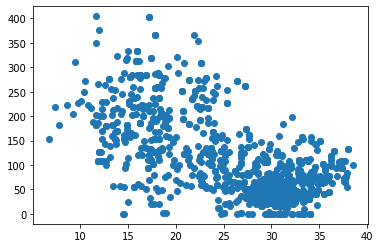

In [14]:
plt.scatter(data['T'],data['PM 2.5'])

In [15]:
data.corr()

T        TM        Tm       SLP         H        VV         V        VM    PM 2.5
T       1.000000  0.967536  0.953719 -0.881409 -0.509299  0.640792  0.301994  0.287738 -0.631462
TM      0.967536  1.000000  0.892031 -0.822958 -0.586681  0.606945  0.292949  0.297011 -0.568409
Tm      0.953719  0.892031  1.000000 -0.917518 -0.287357  0.577240  0.296225  0.266782 -0.673824
SLP    -0.881409 -0.822958 -0.917518  1.000000  0.240256 -0.517915 -0.329838 -0.310704  0.623187
H      -0.509299 -0.586681 -0.287357  0.240256  1.000000 -0.465374 -0.380575 -0.362177  0.138005
VV      0.640792  0.606945  0.577240 -0.517915 -0.465374  1.000000  0.376873  0.342442 -0.573941
V       0.301994  0.292949  0.296225 -0.329838 -0.380575  0.376873  1.000000  0.775655 -0.268530
VM      0.287738  0.297011  0.266782 -0.310704 -0.362177  0.342442  0.775655  1.000000 -0.215854
PM 2.5 -0.631462 -0.568409 -0.673824  0.623187  0.138005 -0.573941 -0.268530 -0.215854  1.000000

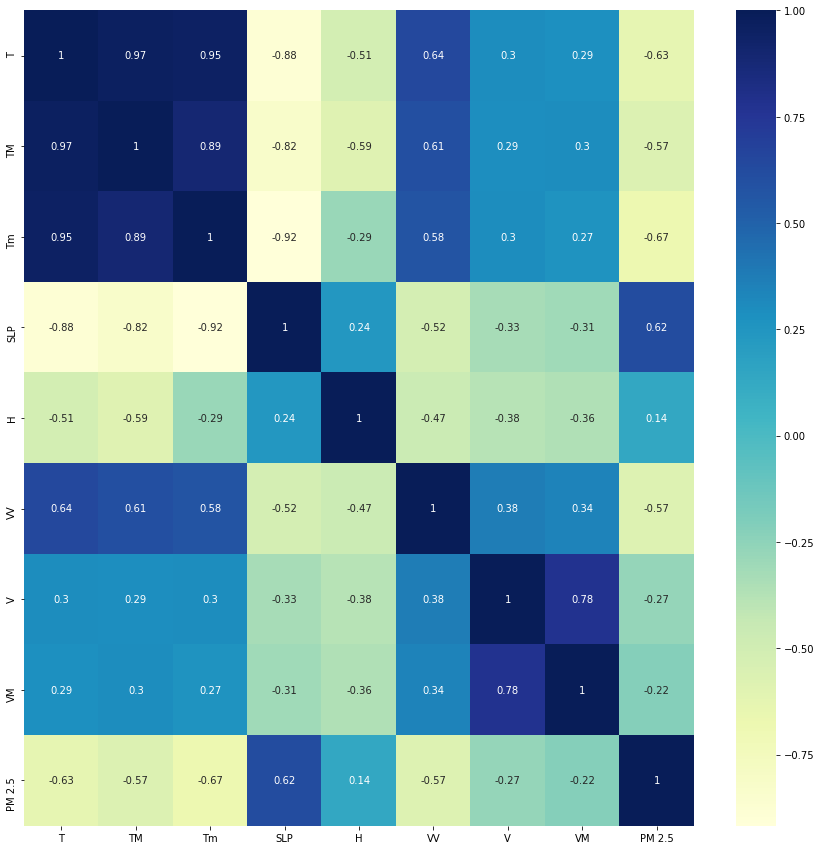

In [16]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),yticklabels=True,annot=True,cmap="YlGnBu")

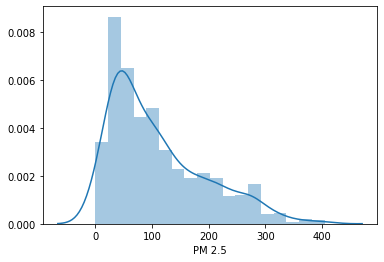

In [17]:
sns.distplot(y)

### TRAIN TEST SPLIT

In [126]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.3)


In [127]:
decsion_tree = DecisionTreeRegressor(criterion="mse")

In [128]:
decsion_tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [129]:
print("coefficient of determination on train set is : {}".format(decsion_tree.score(x_train,y_train)))

coefficient of determination on train set is : 1.0


In [131]:
print("coefficient of determination on train set is : {}".format(decsion_tree.score(x_test,y_test)))

coefficient of determination on train set is : 0.6576782772524871


In [38]:
 score = cross_val_score(decsion_tree,x,y,cv=5)

In [39]:
score.mean()

0.42858649614962463

### TREE VISUALIZATION

In [50]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot


In [45]:
features = list(data.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [47]:
import os

os.environ['PATH'] = os.environ['PATH']  + ';' + os.environ['CONDA_PREFIX']+r"\library\bin\graphvi"

In [59]:
dot_data = StringIO()
export_graphviz(decsion_tree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
                
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())                
Image(graph.create_png())   
#graph.write_png('decisionTree.png')

In [60]:
prediction = decsion_tree.predict(x_test)


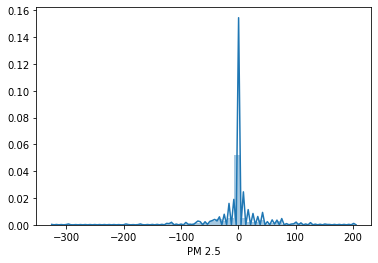

In [62]:
sns.distplot(y_test-prediction)

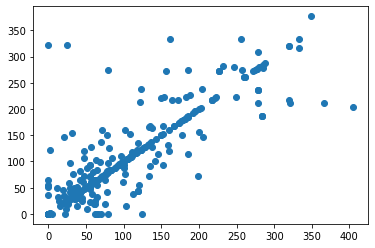

In [64]:
plt.scatter(y_test,prediction)

### HYPER PARAMETER TUNING WITH DECSION TREE

In [86]:
model = DecisionTreeRegressor()

In [94]:
params = {"splitter": ["best","random"],
          "max_depth" : [3,4,5,6,8,10,12,15],
          "min_samples_leaf" : [1,2,3,4,5],
          "min_weight_fraction_leaf" : [0.1,0.2,0.3,0.4],
          "max_features" : ["auto","log2","sqrt",None],
          "max_leaf_nodes" : [None,10,20,30,40,50,60,70]
         }

In [95]:
decisonTree_Grid = GridSearchCV(model,param_grid=params,scoring="neg_mean_squared_error",cv=10,n_jobs=-1,verbose=3)

In [96]:
decisonTree_Grid.fit(x,y)

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 2436 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 7556 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 14724 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 22692 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 28260 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 34916 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 42596 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 51300 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 61028 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 71780 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 83556 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 96356 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 102400 out of 102400 | elapsed:  7.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                

In [97]:
decisonTree_Grid.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 30,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [98]:
decisonTree_Grid.best_score_

-3131.648961917888

In [104]:
decisonTree_Grid_trained =  DecisionTreeRegressor(max_depth = 5,
 max_features= "auto",
 max_leaf_nodes= 30,
 min_samples_leaf= 4,
 min_weight_fraction_leaf= 0.1,
 splitter= 'best')

In [133]:
decisonTree_Grid_trained.fit(x,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.1, presort='deprecated',
                      random_state=None, splitter='best')

In [134]:
print("coefficient of determination on train set is : {}".format(decisonTree_Grid_trained.score(x_train,y_train)))

coefficient of determination on train set is : 0.6027559289896129


In [135]:
print("coefficient of determination on train set is : {}".format(decisonTree_Grid_trained.score(x_test,y_test)))

coefficient of determination on train set is : 0.5572451030467488


In [121]:
prediction = decisonTree_Grid_trained.predict(x_test)

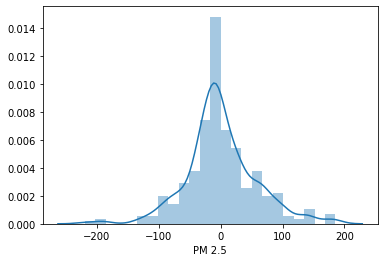

In [122]:
sns.distplot(y_test-prediction)

In [123]:
print("MAE for the test data is {}".format(metrics.mean_absolute_error(y_test,prediction)))
print("MSE for the test data is {}".format(metrics.mean_squared_error(y_test,prediction)))
print("RMSE for the test data is {}".format(np.sqrt(metrics.mean_squared_error(y_test,prediction))))

MAE for the test data is 41.298170151003916
MSE for the test data is 3297.2454818253245
RMSE for the test data is 57.421646456935775


In [137]:
import pickle

In [141]:
file = open("decison_regressor_model.pkl",'wb')
pickle.dump(decisonTree_Grid_trained,file)